# Q1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use('seaborn')

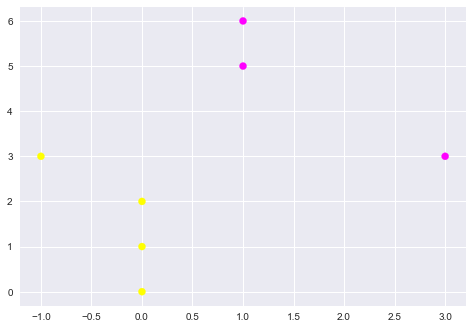

In [2]:
point=np.matrix([[-1,3],[0,2],[0,1],[0,0],[1,5],[1,6],[3,3]])
x=np.array([-1,0,0,0,1,1,3])
y=np.array([3,2,1,0,5,6,3])
classType=np.array([1,1,1,1,0,0,0])
plt.scatter(x,y,c=classType,s=50, cmap='spring')

In [3]:
from sklearn.svm import SVC  # "Support Vector Classifier"
clf_a = SVC(kernel='linear')
clf_a.fit(point, classType)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [4]:
def plot_svc_decision_function(clf, ax=None):
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf_a.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

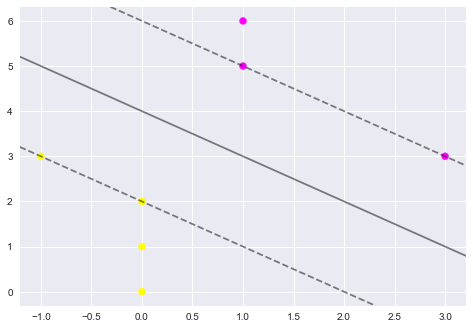

In [5]:
plt.scatter(x,y,c=classType,s=50, cmap='spring')
plot_svc_decision_function(clf_a);

__w=[[-1],[1]] b=4__

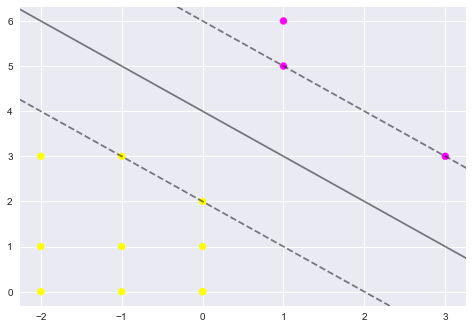

In [6]:
point=np.matrix([[-1,3],[0,2],[0,1],[0,0],[1,5],[1,6],[3,3],[-2,0],[-2,1],[-2,3],[-1,0],[-1,1],[0,0]])
x=np.array([-1,0,0,0,1,1,3,-2,-2,-2,-1,-1,0])
y=np.array([3,2,1,0,5,6,3,0,1,3,0,1,0])
classType=np.array([1,1,1,1,0,0,0,1,1,1,1,1,1])
clf_c = SVC(kernel='linear')
clf_c.fit(point, classType)
plt.scatter(x,y,c=classType,s=50, cmap='spring')
plot_svc_decision_function(clf_c);

__w=[[-1],[1]] b=4__

# Q3

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
import sklearn.metrics as sm
df = pd.read_csv('wdbc.csv')
# df.dtypes
x=df.iloc[:,2:31].values
y=df.iloc[:,1].values

In [8]:
# B=>0 M=>1
def transform(x):
    for i in range(0,len(x)):
        if(x[i]=='B'):
            x[i]=0;
        else:
            x[i]=1;

In [9]:
score_train=[]
score_test=[]
precision=[]
recall=[]
for turns in range(0,20):
    (x_train,x_test,y_train,y_test)=train_test_split(x, y, test_size=0.3)
    clf_linear = SVC(kernel='linear',C=0)
    clf_linear.fit(x_train, y_train)
    score_test.append(round(sm.accuracy_score(y_test,clf_linear.predict(x_test)),5))
    score_train.append(round(sm.accuracy_score(y_train,clf_linear.predict(x_train)),5))
    y_pred_linear=clf_linear.predict(x_test)
    transform(y_test)
    transform(y_pred_linear)
    precision.append(round(sm.precision_score(y_test.astype(int),y_pred_linear.astype(int)),5))
    recall.append(round(sm.recall_score(y_test.astype(int),y_pred_linear.astype(int)),5))
accurancy_test=np.average(score_test)
accurancy_train=np.average(score_train)  
precision_linear=np.average(precision)
recall_linear=np.average(recall)
print("For SVM1:\nTrain accurancy=%f\nTest accurancy=%f"%(accurancy_train,accurancy_test))
print("Precision=%f"%precision_linear)
print("Recall=%f"%recall_linear)

ValueError: C <= 0

In [ ]:
score_train=[]
score_test=[]
precision=[]
recall=[]
for turns in range(0,20):
    (x_train,x_test,y_train,y_test)=train_test_split(x, y, test_size=0.3)
    clf_rbf = SVC(kernel='rbf')
    clf_rbf.fit(x_train, y_train)
    score_test.append(round(sm.accuracy_score(y_test,clf_rbf.predict(x_test)),5))
    score_train.append(round(sm.accuracy_score(y_train,clf_rbf.predict(x_train)),5))
    y_pred_rbf=clf_rbf.predict(x_test)
    transform(y_test)
    transform(y_pred_rbf)
    precision.append(round(sm.precision_score(y_test.astype(int),y_pred_rbf.astype(int)),5))
    recall.append(round(sm.recall_score(y_test.astype(int),y_pred_rbf.astype(int)),5))
accurancy_test=np.average(score_test)
accurancy_train=np.average(score_train)  
precision_rbf=np.average(precision)
recall_rbf=np.average(recall)
print("For SVM2:\nTrain accuracy=%f\nTest accurancy=%f"%(accurancy_train,accurancy_test))
print("Precision=%f"%precision_rbf)
print("Recall=%f"%recall_rbf)

In [ ]:
score_train=[]
score_test=[]
precision=[]
recall=[]
accurance=[]
for turns in range(0,20):
    (x_train,x_test,y_train,y_test)=train_test_split(x, y, test_size=0.3)
    clf_rbf_limit = SVC(kernel='rbf',C=500)
    clf_rbf_limit.fit(x_train, y_train)
    score_test.append(round(sm.accuracy_score(y_test,clf_rbf_limit.predict(x_test)),5))
    score_train.append(round(sm.accuracy_score(y_train,clf_rbf_limit.predict(x_train)),5))
    y_pred_rbf_limit=clf_rbf_limit.predict(x_test)
    transform(y_test)
    transform(y_pred_rbf_limit)
    precision.append(round(sm.precision_score(y_test.astype(int),y_pred_rbf_limit.astype(int)),5))
    recall.append(round(sm.recall_score(y_test.astype(int),y_pred_rbf_limit.astype(int)),5))
accurancy_test=np.average(score_test)
accurancy_train=np.average(score_train)  
precision_rbf_limit=np.average(precision)
recall_rbf_limit=np.average(recall)
print("For SVM2:\nTrain accuracy=%f\nTest accurancy=%f"%(accurancy_train,accurancy_test))
print("Precision=%f"%precision_rbf_limit)
print("Recall=%f"%recall_rbf_limit)

||Accuracy|Accuracy|Precision|Recall|
|---|---|---|---|---|
||Train|Test|||
|SVM1|0.970|0.948|0.949|0.912|
|SVM2|0.913|0.913|0.975|0.794|
|SVM3 C=500|0.954|0.952|0.954|0.913|